In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing = pd.read_csv('/content/drive/My Drive/Projetos Data Science/california_housing_prince_prediction/housing.csv')
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



Há 20640 ocorrências e total_bedrooms tem apenas 20433 valores não nulos (207 valores ausentes)

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


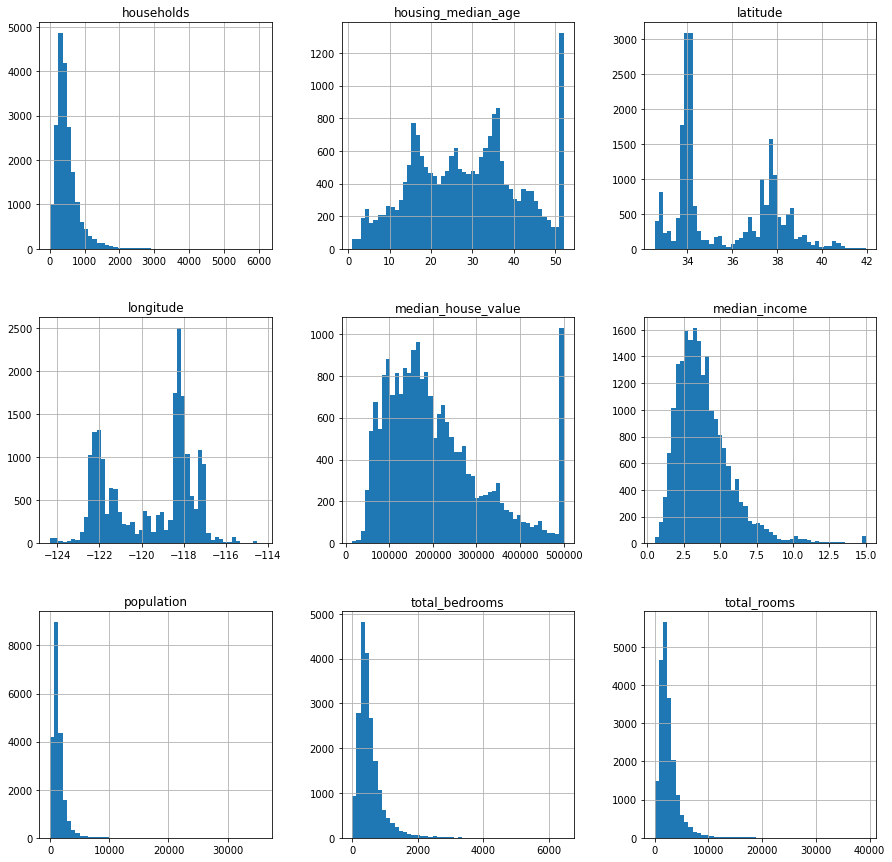

In [7]:
housing.hist(bins=50, figsize=(15, 15))
plt.show()

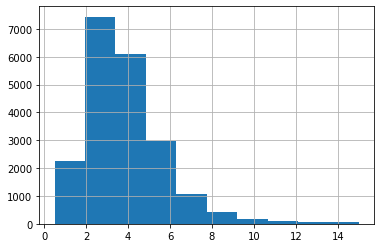

In [8]:
#renda média 
housing['median_income'].hist()

In [9]:
#dividindo e limitando a categoria de renda
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

#colocando tudo acima da 5ª categoria
housing['income_cat'].where(housing['income_cat'] < 5, other = 5.0, inplace = True)

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 29)

for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [12]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Como visto acima, as proporções são mantidas na amostra estratificada do conjunto de teste.

Porque estratificado? Porque o espaço de recursos é menor e também porque é um conjunto de dados de tamanho médio e não queremos perder nenhum dado.

In [14]:
#Utilizando a amostragem aleatoria
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 29)

In [15]:
def income_cat_proportions(data):
  return data['income_cat'].value_counts() / len(data)


comparing_props = pd.DataFrame({
    "Overall Props": income_cat_proportions(housing),
    "Random": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strat_test_set),
}).sort_index()

comparing_props['random %error'] = 100 * comparing_props['Random'] / comparing_props['Overall Props'] - 100
comparing_props['strat %error'] = 100 * comparing_props['Stratified'] / comparing_props['Overall Props'] - 100
comparing_props

,Overall Props,Random,Stratified,random %error,strat %error
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011


In [16]:
for itens in (strat_train_set, strat_test_set):
  itens.drop('income_cat', axis = 1, inplace = True)

In [17]:
housing = strat_train_set.copy()

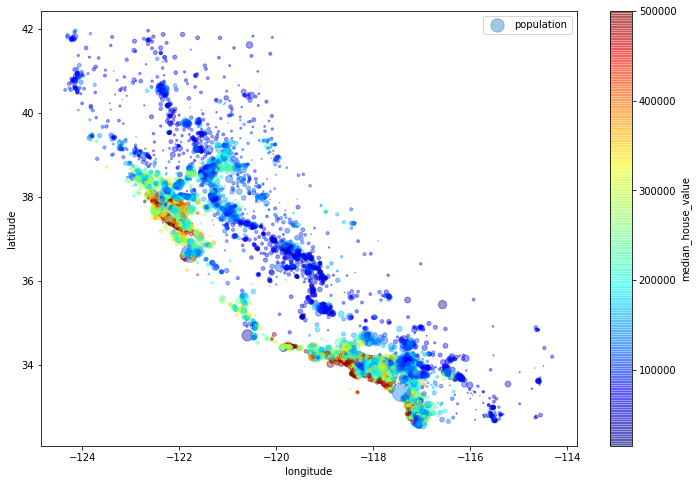

In [18]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s=housing['population'] / 100, label = 'population', figsize = (12,8), 
             c = 'median_house_value', cmap = plt.get_cmap('jet'), sharex = False)

plt.legend()

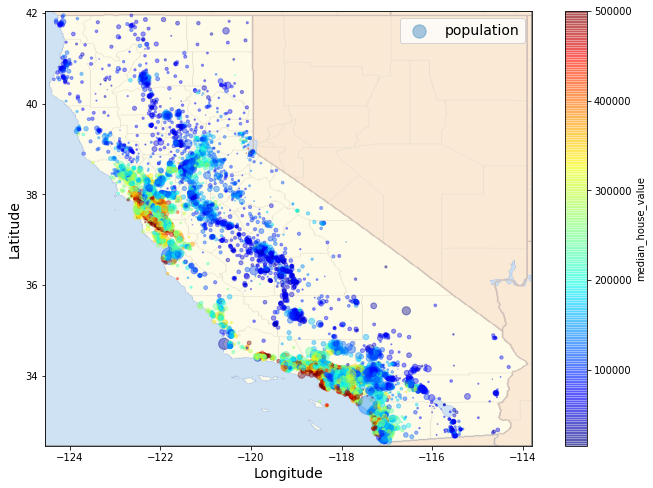

In [19]:
import matplotlib.image as mpimg

ax = housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s=housing['population'] / 100, label = 'population', figsize = (12,8), 
             c = 'median_house_value', cmap = plt.get_cmap('jet'), sharex = False)

california_img = mpimg.imread('/content/drive/My Drive/Projetos Data Science/california_housing_prince_prediction/California.png')

plt.imshow(california_img, extent = [-124.55, -113.8, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet'))

plt.xlabel('Longitude', fontsize = 14)
plt.ylabel('Latitude', fontsize = 14)

plt.legend(fontsize = 14)
plt.show()

In [20]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924722,-0.105995,0.040909,0.067200,0.094516,0.051637,-0.016472,-0.043780
latitude,-0.924722,1.000000,0.007958,-0.031951,-0.064306,-0.104614,-0.067934,-0.079775,-0.146422
housing_median_age,-0.105995,0.007958,1.000000,-0.361488,-0.319775,-0.293487,-0.301376,-0.112323,0.108483
total_rooms,0.040909,-0.031951,-0.361488,1.000000,0.930315,0.855548,0.918100,0.189669,0.127306
total_bedrooms,0.067200,-0.064306,-0.319775,0.930315,1.000000,0.877211,0.979905,-0.014001,0.043921
population,0.094516,-0.104614,-0.293487,0.855548,0.877211,1.000000,0.906144,-0.001476,-0.028341
households,0.051637,-0.067934,-0.301376,0.918100,0.979905,0.906144,1.000000,0.006599,0.060084
median_income,-0.016472,-0.079775,-0.112323,0.189669,-0.014001,-0.001476,0.006599,1.000000,0.691071
median_house_value,-0.043780,-0.146422,0.108483,0.127306,0.043921,-0.028341,0.060084,0.691071,1.000000


Procurando por corelações utilizando a equação de correlação de distância de Pearson.

In [21]:
#utilizando o método .corr do pandas para calcular as correlações.
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

Está sempre entre -1 (menos correlacionado) e 1 (altamente correlacionado)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f785d335588>,
      dtype=object)

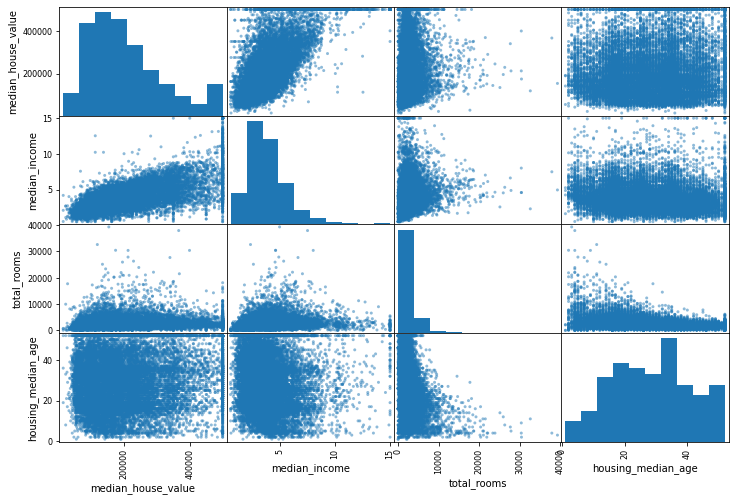

In [22]:
#outra abordagem é usar o gráfico de dispersão de forma A vs B
#o problema com isso é que (para N recursos, haverá n² plotagens)
imp_attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

from pandas.plotting import scatter_matrix

scatter_matrix(housing[imp_attributes], figsize = (12, 8))

(0.0, 16.0, 0.0, 550000.0)

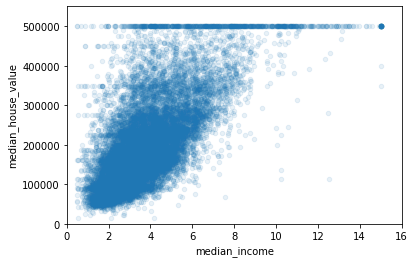

In [23]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.axis([0, 16, 0, 550000])

Recursos

In [25]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_housegold'] = housing['population'] / housing['households']
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

In [26]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_housegold   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

**Observação**: o novo quarto por cômodo está altamente correlacionado, mas de forma recíproca com o valor médio da casa, então a casa com menor proporção quarto / cômodo tenderá a ser mais cara

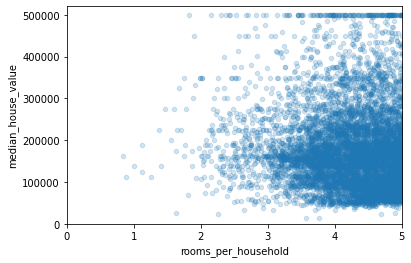

In [30]:
housing.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_housegold,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,0.212973,3.103875,5.434516
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,0.058323,11.603193,2.520743
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,0.175448,2.433980,4.443478
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,0.202964,2.817596,5.230221
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,0.239351,3.273248,6.056361
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


Preparando os dados


In [32]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7771 to 20194
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [34]:
#calculo do valor medio
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


In [35]:
#utilizando Scikit-Learn's
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [36]:
housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [38]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [39]:
#usando o computador que criamos acima, transformando o conjunto de treinamento, 
#substituindo os valores ausentes pelas medianas aprendidas
X = imputer.transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [41]:
#verificando os valores cruzados
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [42]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


Manipulação de valores categóricos

In [44]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [45]:
#pandas possuem método de fatoração para convertê-los em características categóricas
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [46]:
housing_cat_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2])

In [47]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [50]:
# usando scikit-learn OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1))

In [51]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [53]:
#uma vez que 1 codificador hot retorna uma matriz de espaço, é necessário alterá-lo para uma matriz densa
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])